# Rex McArthur
## Lab 5 - Intro to TensorBoard

In [1]:
from __future__ import division
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
% matplotlib inline

In [3]:
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

In [4]:
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot = True)
sess = tf.InteractiveSession()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Define the model

In [5]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

#Place Hoders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

#First Layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


#Second Layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#Dense Layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Drop Out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#SoftMax 
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)




### Run the Model

In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
for i in range(1000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})


### Add Tensor Board

In [5]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

#Place Hoders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

#First Layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


#Second Layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#Dense Layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Drop Out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#SoftMax 
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)




In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
for i in range(1000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})


In [5]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)


# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Train
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [6]:
pct_correct = []
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run( train_step, feed_dict = {x: batch_xs, y_: batch_ys})
    pct_correct.append(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

### Plot correct

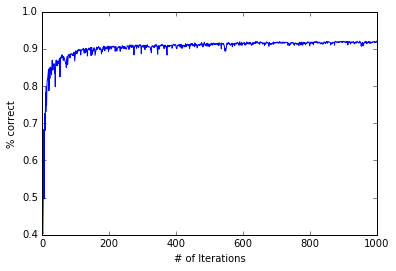

One layer net has accuracy of 0.917500019073


In [7]:
x = np.arange(1,1001)
plt.plot(x, pct_correct)
plt.xlabel('# of Iterations')
plt.ylabel('% correct')
plt.show()
print('One layer net has accuracy of {}'.format(pct_correct[-1]))

## 2-Layer Net
### Build the Model with one bias and 200 hiddel layer dimension

In [8]:
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot = True)
sess = tf.InteractiveSession()


A = 200
# Create the model With a bias
x = tf.placeholder(tf.float32, [None, 784])

W1 = tf.Variable(tf.random_normal([784, A], stddev = .001))
W2 = tf.Variable(tf.random_normal([A,10], stddev = .001))
b = tf.Variable(tf.random_normal([10], stddev = .001))

# Add Nodes
a = tf.matmul(x, W1)
a_relu = tf.nn.relu(a)
y = tf.nn.softmax(tf.matmul(a_relu, W2) + b)


# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Train
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [9]:
accuracy_hist = []
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run( train_step, feed_dict = {x: batch_xs, y_: batch_ys})
    accuracy_hist.append(sess.run(accuracy, feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

### Plot Correct

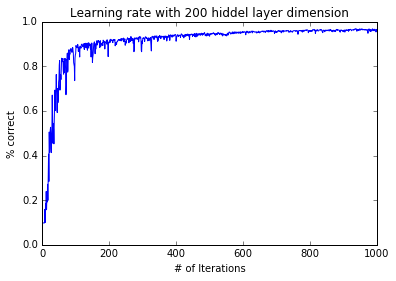

In the last iteration, we had an accuracy of 0.961199998856, which is pretty good


In [10]:
x = np.arange(1,1001)
plt.plot(x, accuracy_hist)
plt.title('Learning rate with {} hiddel layer dimension'.format(A))
plt.xlabel('# of Iterations')
plt.ylabel('% correct')
plt.show()
print('In the last iteration, we had an accuracy of {}, which is pretty good'.format(accuracy_hist[-1]))

### After playing around with the HIdden layer dimension, we found that by increasing from 20 to 200 dimensions to the inside piece, we can improve accuracy from 94% to 96% so more inside dimensions improves accuracy.